# Project: Superconductivity Regression Analysis

### Abstract:
This project focuses on predicting the critical temperature of superconductors based on various features derived from the material's chemical properties. Superconductors, materials that exhibit zero electrical resistance under certain conditions, are critical for advancements in energy-efficient power transmission, magnetic levitation, and medical imaging technologies like MRI. Understanding and predicting the critical temperature at which a material becomes superconducting is an essential task in materials science and could revolutionize multiple industries by enabling the development of more efficient superconductors.#

## Importance:
Superconductivity plays a pivotal role in energy conservation and technological advancements. Discovering materials with higher critical temperatures can lead to the development of more efficient energy storage systems, lossless energy transmission lines, and powerful computing systems based on quantum mechanics. By creating predictive models using machine learning techniques, we can accelerate the discovery process for such materials, cutting down on experimental costs and speeding up innovation in the fiel#d.

## Dataset:
The dataset used in this project is the **Superconductivity Data** obtained from the UCI Machine Learning Repository. It contains 81 features derived from the chemical properties of various materials, and the target variable is the critical temperature (Tc) of each material. The dataset includes details on the atomic composition, number of valence electrons, mean atomic masses, and more. It serves as a valuable resource for applying machine learning algorithms to uncover patterns that correlate with superconducting properties.

The dataset can be found at: [Superconductivity Data - UCI Repository](https://archive.ics.uci.edu/dataset/464/superconductivty+data).


## Importing Initial Dependencies

In this section, we import the necessary libraries and modules required for data analysis, visualization, preprocessing, model building, and evaluation.

- **numpy**: A fundamental library for numerical computations in Python, providing support for large multi-dimensional arrays and matrices.
- **pandas**: A powerful data manipulation and analysis library, used here for handling the dataset and performing data operations.
- **matplotlib.pyplot**: A 2D plotting library used for generating static, interactive, and animated visualizations in Python.
- **seaborn**: A statistical data visualization library built on top of Matplotlib, used for making attractive and informative statistical graphics.
- **sklearn.preprocessing.StandardScaler & MinMaxScaler**: Tools for feature scaling, crucial for algorithms that rely on distance metrics or gradient descent. StandardScaler standardizes the features by removing the mean and scaling to unit variance, while MinMaxScaler scales features between a given range (e.g., 0 and 1).
- **sklearn.model_selection.GridSearchCV & train_test_split**: GridSearchCV helps in hyperparameter tuning by trying different combinations, while train_test_split is used to split the dataset into training and testing sets.
- **sklearn.linear_model.Lasso & Ridge**: Lasso and Ridge are linear regression models with L1 and L2 regularization respectively, used to avoid overfitting and improve model performance.
- **xgboost.XGBRegressor**: A powerful and scalable gradient-boosted decision tree algorithm designed for efficiency and performance, especially on large datasets.
- **sklearn.ensemble.RandomForestRegressor**: A robust ensemble learning method that fits a number of decision tree regressors on various sub-samples and averages their predictions.
- **sklearn.metrics.r2_score & mean_squared_error**: Functions for evaluating the model's performance using metrics such as R-squared and Mean Squared Error (MSE).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Lasso,Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

## Loading the Modified Dataset

In this section, we load the modified dataset that has been prepared from two initial datasets. The first dataset includes the physical and chemical properties of various substances, while the second dataset contains the elemental breakdown counts along with critical temperatures. These datasets were concatenated to combine all features, aiming to enhance the decision-making process by utilizing a more comprehensive set of information.

However, the concatenation resulted in a total of approximately 168 columns, which introduces several challenges:

1. **High Dimensionality**: With so many features, it becomes difficult to visualize and interpret the data effectively.
2. **Overfitting Risk**: Models trained on high-dimensional data may learn noise instead of the underlying patterns, leading to poor generalization on unseen data.
3. **Computational Complexity**: Increased dimensions can lead to longer training times and higher resource consumption, making model training inefficient.
4. **Curse of Dimensionality**: As dimensionality increases, the volume of the space increases, which can lead to sparse data and hinder model performance.

To address these issues, we grouped the elemental columns based on their physical and chemical properties, taking into account the interrelationships of elements in their respective groups in the Modern Periodic Table. This step significantly reduced the dimensionality while preserving the essential information.

Now, we proceed to load the final dataset.


In [3]:
df = pd.read_csv('./reduced_dataset.csv')
df

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  ...  non_metals  noble_gases  lanthanides
0                       4         88.944468             57.862692  ...         4.0            0         1.80
1                       5         92.729214             58.518416  ...         4.0            0         1.90
2                       4         88.944468             57.885242  ...         4.0            0         1.90
3                       4         88.944468             57.873967  ...         4.0            0         1.85
4                       4         88.944468             57.840143  ...         4.0            0         1.70
...                   ...               ...                   ...  ...         ...          ...          ...
21258                   4        106.957877             53.095769  ...         0.0            0         1.00
21259                   5         92.266740             49.021367  ...        11.0            0         0.00
21260                   2         99.663190             95.609104  ...         0.0            0         0.00
21261                   2         99.663190             97.095602  ...         0.0            0         0.00
21262                   3         87.468333             86.858500  ...         0.2            0         0.00

[21263 rows x 90 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 90 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [8]:
ser = df.isnull().sum()
ser[ser>0]

Series([], dtype: int64)

### No Null Values Found

After examining the dataset, it has been confirmed that there are no missing or null values present. This ensures that the dataset is complete and ready for further analysis without the need for handling missing data.


In [10]:
df.describe().transpose()

count       mean        std       min        25%        50%         75%       max
number_of_elements      21263.0   4.115224   1.439295  1.000000   3.000000   4.000000    5.000000    9.0000
mean_atomic_mass        21263.0  87.557631  29.676497  6.941000  72.458076  84.922750  100.404410  208.9804
wtd_mean_atomic_mass    21263.0  72.988310  33.490406  6.423452  52.143839  60.696571   86.103540  208.9804
gmean_atomic_mass       21263.0  71.290627  31.030272  5.320573  58.041225  66.361592   78.116681  208.9804
wtd_gmean_atomic_mass   21263.0  58.539916  36.651067  1.960849  35.248990  39.918385   73.113234  208.9804
...                         ...        ...        ...       ...        ...        ...         ...       ...
post_transition_metals  21263.0   0.680118   2.840892  0.000000   0.000000   0.000000    0.550000  100.0000
metalloids              21263.0   0.629441   3.283033  0.000000   0.000000   0.000000    0.000000  105.0000
non_metals              21263.0   3.653041   5.639497  0.000000   0.000000   1.600000    6.905000  120.0000
noble_gases             21263.0   0.000000   0.000000  0.000000   0.000000   0.000000    0.000000    0.0000
lanthanides             21263.0   0.524461   2.725493  0.000000   0.000000   0.000000    1.000000  185.1500

[90 rows x 8 columns]

In [11]:
column_list = df.columns
print(column_list)

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

## Univariate Analysis

In this step, we perform univariate analysis to understand the distribution of individual features within the dataset. Univariate analysis helps in identifying the basic statistics and spread of each feature, which is essential for understanding the dataset better. 

- **Histogram Plots**: Histograms are used to visualize the frequency distribution of the feature values. They help in understanding the spread, skewness, and outliers in the data.
  
- **KDE (Kernel Density Estimate) Plots**: KDE plots provide a smooth estimate of the probability density function of a feature. This is helpful in observing the overall shape of the distribution, especially when identifying whether the data is unimodal or multimodal.

By analyzing these distributions, we can infer whether any scaling or transformation is required, and identify the presence of outliers in the dataset.


In [18]:
def plot_histograms(df, columns, bins=15):
    num_cols = 3  # Number of columns in the grid
    num_rows = (len(columns) + num_cols - 1) // num_cols  # Calculate required rows
    
    plt.figure(figsize=(8 * num_cols, 6 * num_rows))  # Set figure size based on grid dimensions
    for i, col in enumerate(columns):
        plt.subplot(num_rows, num_cols, i + 1)  # Create subplot
        plt.hist(df[col], bins=bins)
        plt.title(col)
        
    plt.tight_layout()
    plt.show()

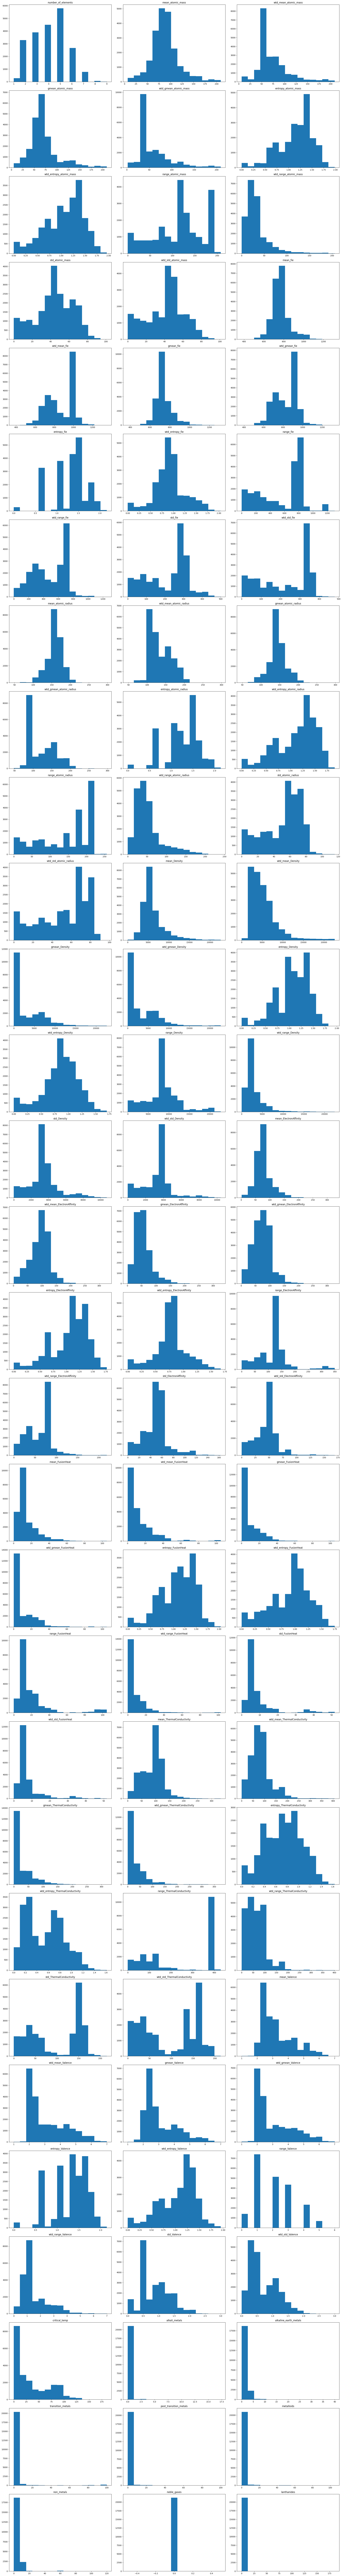

In [19]:
plot_histograms(df, column_list)

In [20]:
def plot_kde(df, columns):
    num_cols = 3  # Number of columns in the grid
    num_rows = (len(columns) + num_cols - 1) // num_cols  # Calculate required rows
    
    plt.figure(figsize=(8 * num_cols, 6 * num_rows))  # Set figure size based on grid dimensions
    for i, col in enumerate(columns):
        plt.subplot(num_rows, num_cols, i + 1)  # Create subplot
        sns.kdeplot(df[col], fill=True)  # KDE plot with fill
        plt.title(col)
        
    plt.tight_layout()
    plt.show()

C:\Users\JCIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\JCIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\JCIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\JCIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

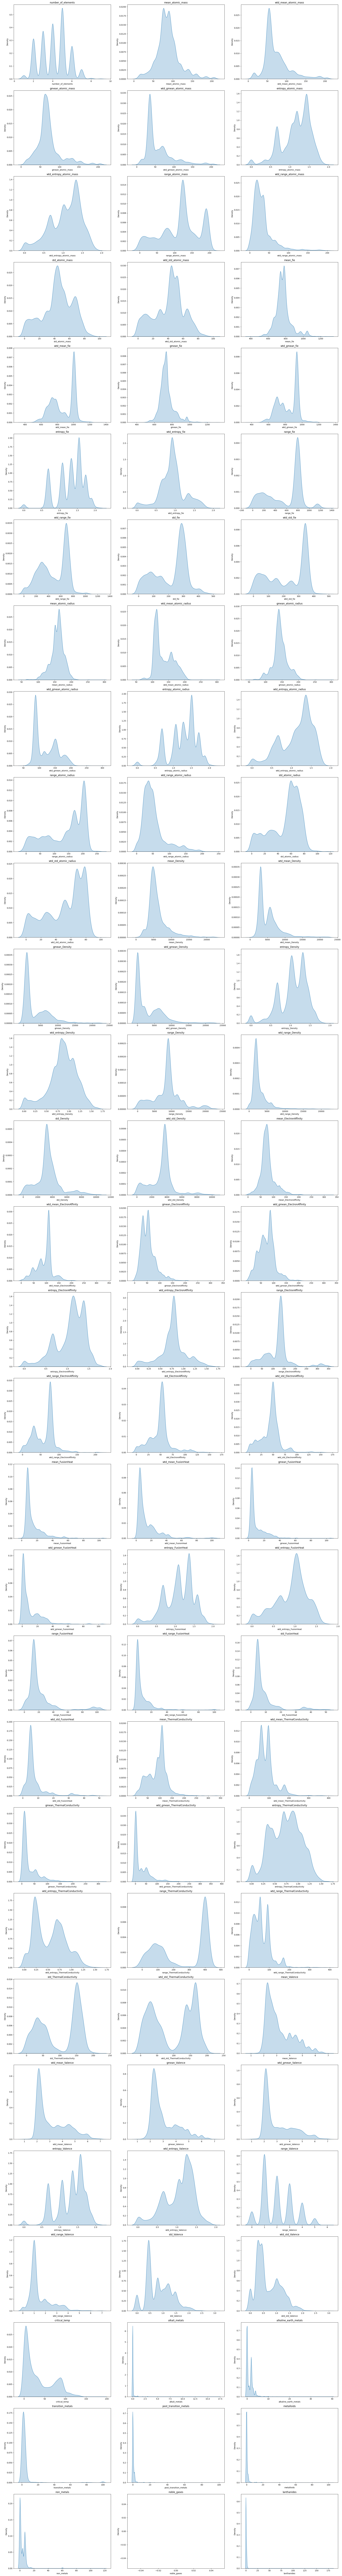

In [21]:
plot_kde(df, column_list)

In [50]:
def identify_outliers(df, features):
    outliers = {}
    
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detecting outliers
        outliers_in_feature = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        
        # Store outliers if any exist in the feature
        if not outliers_in_feature.empty:
            outliers[feature] = outliers_in_feature

    return outliers


In [51]:
outliers_detected = identify_outliers(df, df.columns)
print("Outliers Detected:")
for feature, outliers in outliers_detected.items():
    print(f"Feature: {feature}, Number of outliers: {len(outliers)}")

Outliers Detected:
Feature: number_of_elements, Number of outliers: 14
Feature: mean_atomic_mass, Number of outliers: 1606
Feature: wtd_mean_atomic_mass, Number of outliers: 1239
Feature: gmean_atomic_mass, Number of outliers: 3314
Feature: wtd_gmean_atomic_mass, Number of outliers: 1247
Feature: entropy_atomic_mass, Number of outliers: 387
Feature: wtd_range_atomic_mass, Number of outliers: 1629
Feature: std_atomic_mass, Number of outliers: 4
Feature: wtd_std_atomic_mass, Number of outliers: 15
Feature: mean_fie, Number of outliers: 1913
Feature: gmean_fie, Number of outliers: 1480
Feature: wtd_gmean_fie, Number of outliers: 4
Feature: entropy_fie, Number of outliers: 285
Feature: wtd_entropy_fie, Number of outliers: 2176
Feature: mean_atomic_radius, Number of outliers: 1203
Feature: wtd_mean_atomic_radius, Number of outliers: 11
Feature: gmean_atomic_radius, Number of outliers: 1503
Feature: wtd_gmean_atomic_radius, Number of outliers: 8
Feature: entropy_atomic_radius, Number of outl

## Conclusion on Univariate Analysis

From the univariate analysis, it appears that the majority of features exhibit a somewhat normal distribution, though skewness is a common observation. This skewness might indicate underlying complexities or patterns in the data. 

When analyzing the elemental values, most data points lie between 0 to 20, with some outlier cases. Notably, noble gases have an absolute value of 0. This range is scientifically expected, and given the chemical and physical properties in the dataset, the observations seem consistent.

Regarding the detected outliers, based on domain knowledge, these outliers are more likely to represent significant phenomena rather than noise or errors. In scientific datasets, particularly those related to chemistry and materials science, outliers often correspond to rare but meaningful events, such as materials exhibiting exceptionally high or low critical temperatures in superconductivity.

### Approach to Outliers:
- **Outliers May Be Meaningful**: Outliers in this dataset could provide insights into rare or exceptional cases, such as rare materials with unique properties.
- **Potential Loss of Information**: Removing these outliers could result in the loss of valuable information, especially if they reflect important scientific phenomena.
  
As a result, we will **not remove the outliers**. Instead, we will use machine learning algorithms that are robust and less sensitive to outliers. This approach ensures that the rare but significant information contained within the dataset is preserved and contributes to the model's predictions.

### Next Steps:
- Focus on models such as **Random Forest**, **XGBoost**, and **robust regression methods** to handle outliers effectively.
- Proceed with further analysis and model-building using these robust techniques to improve the model's performance while accounting for potential outliers.


## Bivariate Analysis

In this section, we perform bivariate analysis to understand the relationship between different features in the dataset. One effective way to visualize the relationships and interactions between variables is through a **Heatmap** of the **Correlation Matrix**. 

- **Correlation Matrix**: This matrix shows the pairwise correlation coefficients between the features, highlighting how one feature varies with respect to another. The values range from -1 (strong negative correlation) to +1 (strong positive correlation), with 0 indicating no correlation.
- **Heatmap**: A graphical representation of the correlation matrix, where colors represent the magnitude and direction of correlations. This helps us identify strong positive or negative relationships and multicollinearity, which could impact model performance.

By examining the heatmap, we can focus on features that have significant correlations with the target variable (critical temperature) and among themselves.


In [29]:
def plot_correlation_matrix(df):
    plt.figure(figsize=(15, 10),dpi=250)
    sns.heatmap(df.corr(), annot=False, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix', fontsize=16)
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

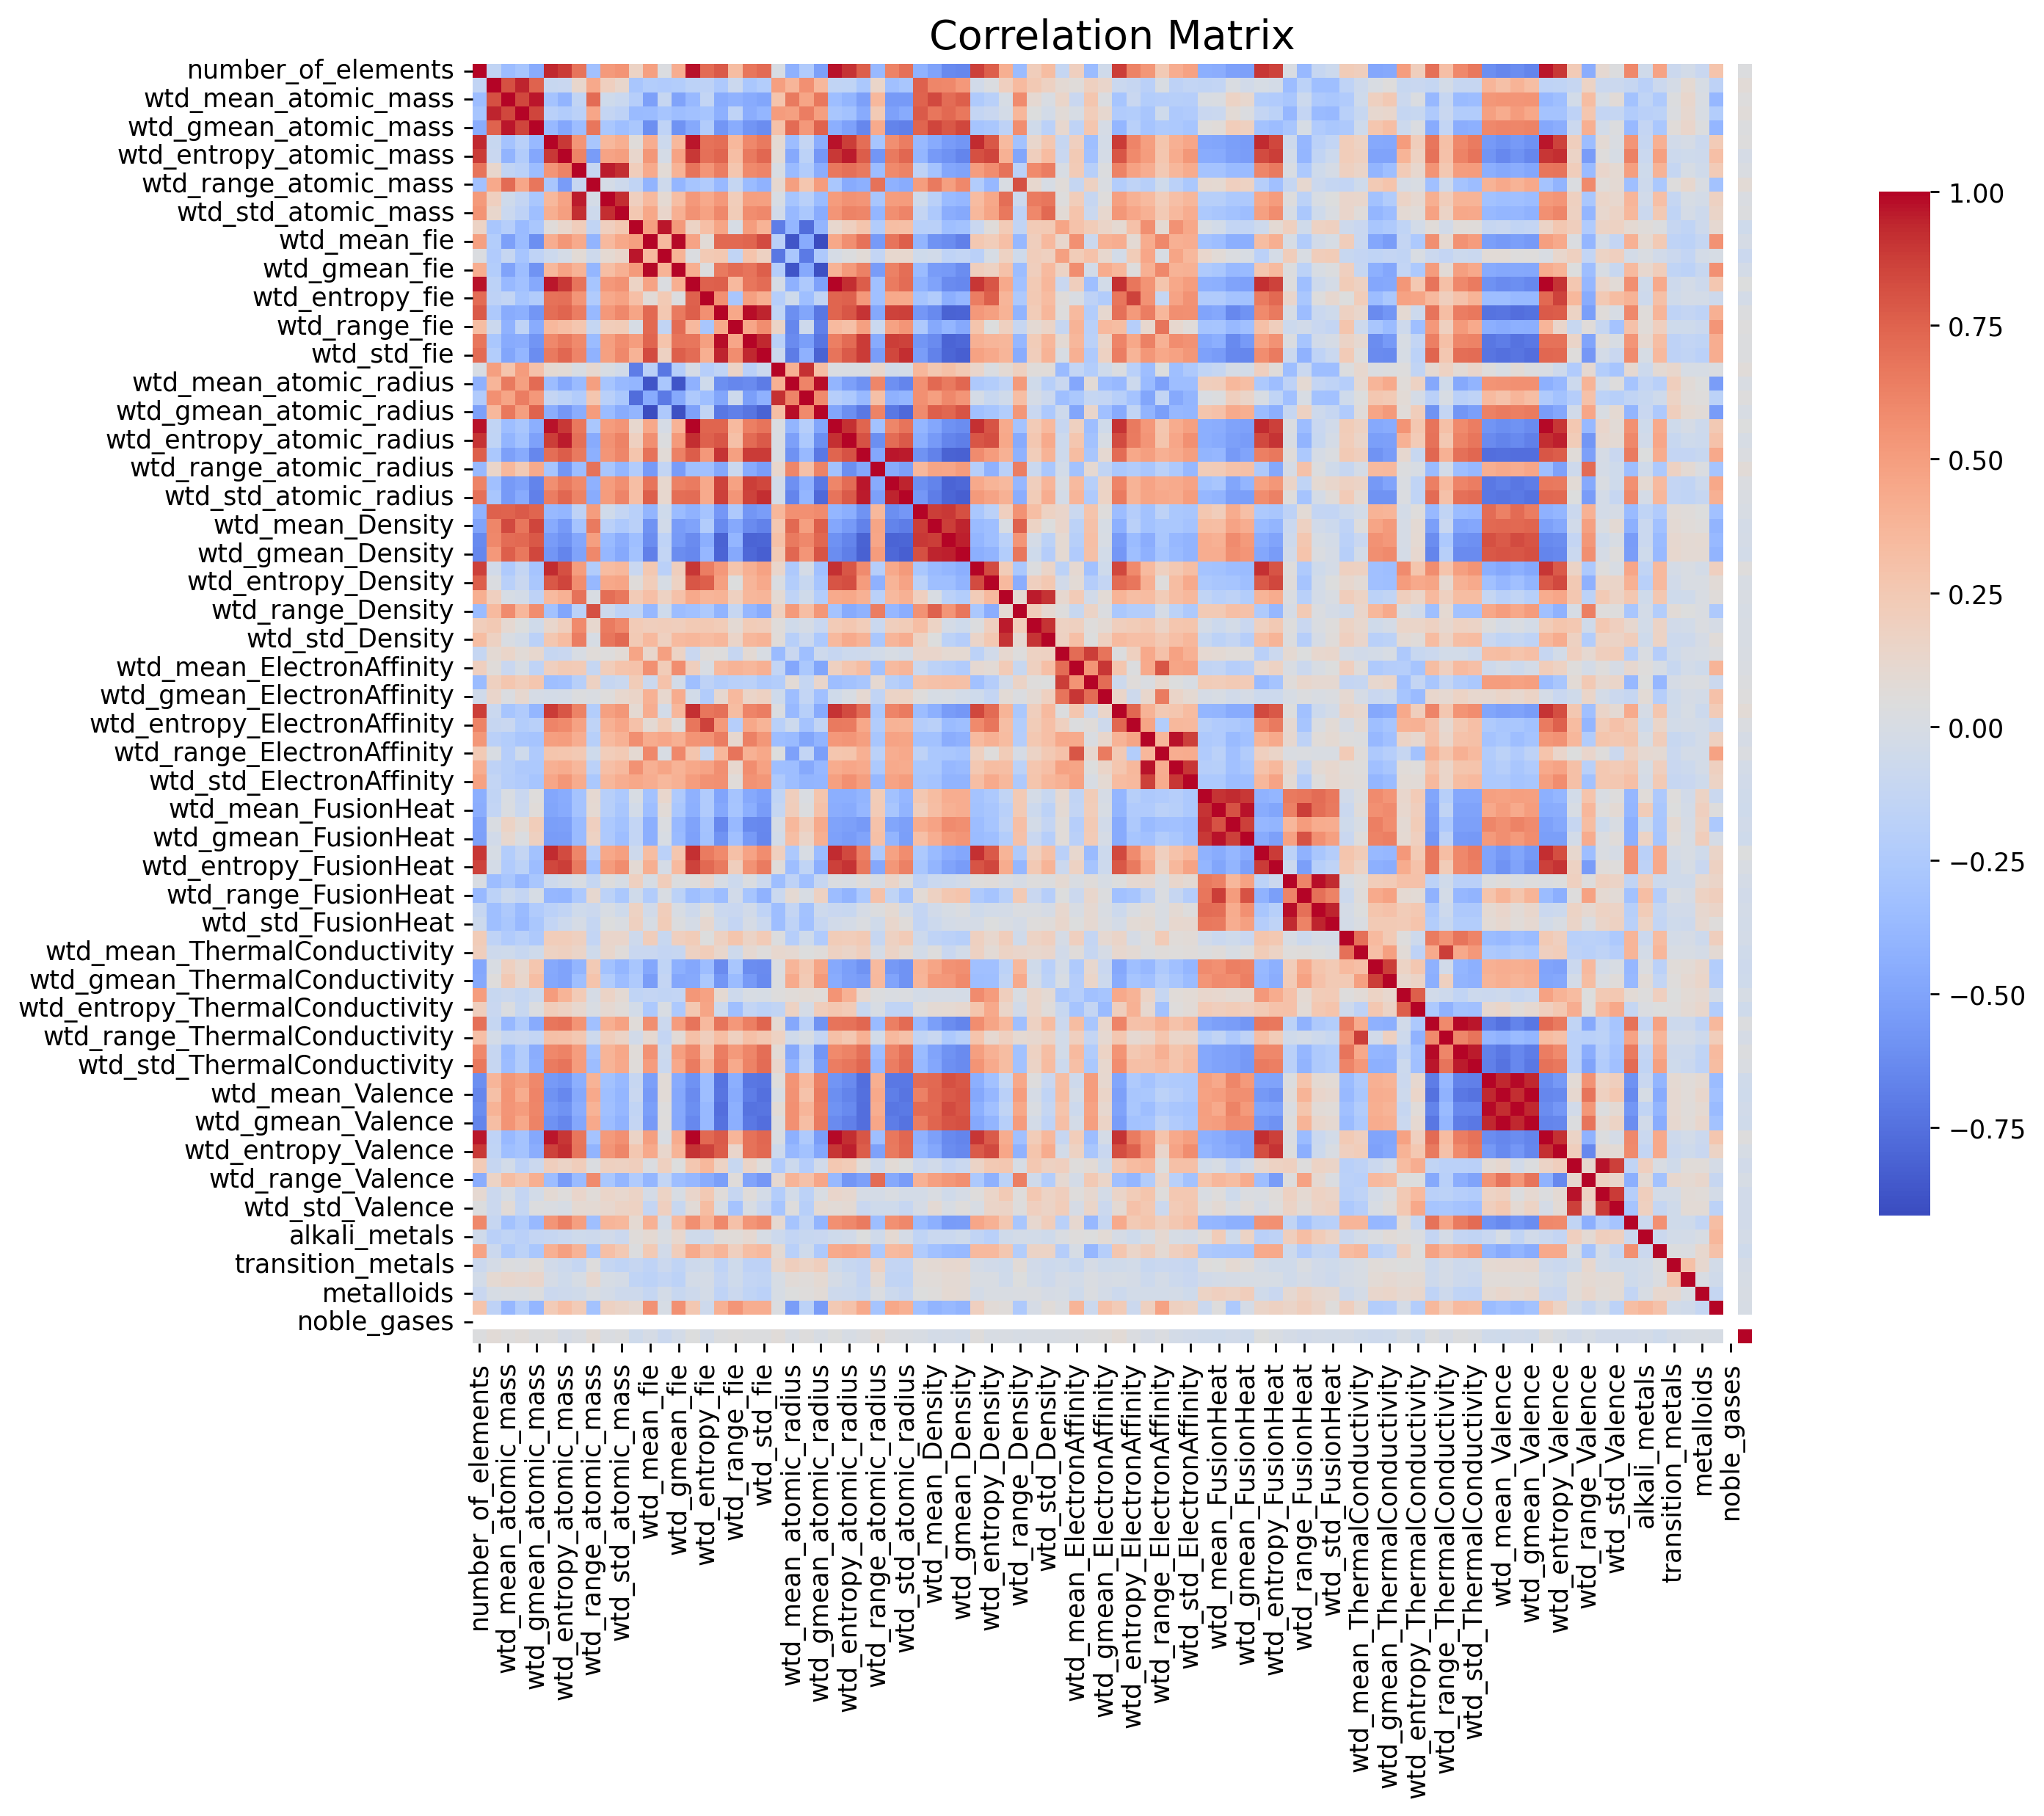

In [30]:
plot_correlation_matrix(df)

In [43]:
correlations = df.corr()['critical_temp'].sort_values(ascending=False)

In [47]:
pos_corr = correlations[correlations>=0.5]
pos_corr

critical_temp                  1.000000
wtd_std_ThermalConductivity    0.721271
range_ThermalConductivity      0.687654
range_atomic_radius            0.653759
std_ThermalConductivity        0.653632
wtd_entropy_atomic_mass        0.626930
wtd_entropy_atomic_radius      0.603494
number_of_elements             0.601069
range_fie                      0.600790
wtd_std_atomic_radius          0.599199
entropy_Valence                0.598591
wtd_entropy_Valence            0.589664
wtd_std_fie                    0.582013
entropy_fie                    0.567817
wtd_entropy_FusionHeat         0.563244
alkaline_earth_metals          0.561520
std_atomic_radius              0.559629
entropy_atomic_radius          0.558937
entropy_FusionHeat             0.552709
entropy_atomic_mass            0.543619
std_fie                        0.541804
Name: critical_temp, dtype: float64

In [49]:
neg_corr = correlations[correlations<=-0.5]
neg_corr

wtd_gmean_Density   -0.540046
gmean_Density       -0.541684
gmean_Valence       -0.573068
mean_Valence        -0.600085
wtd_gmean_Valence   -0.615653
wtd_mean_Valence    -0.632401
Name: critical_temp, dtype: float64

## Conclusion and Analysis of Bivariate Analysis

In our bivariate analysis, we examined the correlations between features and the target variable, **critical_temp**. We identified several features with strong positive and negative correlations:

### Positive Correlations (≥ 0.5)
1. **wtd_std_ThermalConductivity (0.721)**: This high correlation suggests that as the weighted standard deviation of thermal conductivity increases, the critical temperature also tends to rise. This indicates that materials with varying thermal conductivity may exhibit higher superconducting temperatures.
  
2. **range_ThermalConductivity (0.688)**: Similar to the previous feature, a greater range in thermal conductivity appears to correlate with higher critical temperatures, implying that more diverse thermal properties can enhance superconductivity.

3. **number_of_elements (0.601)**: A higher number of elements in a compound or material also correlates with increased critical temperatures, suggesting that the complexity of materials may contribute positively to their superconducting properties.

4. **Various entropy measures (e.g., wtd_entropy_atomic_mass, wtd_entropy_atomic_radius)**: These features indicate that higher entropy values related to atomic mass and radius correlate positively with critical temperature. This may reflect the stability and variability of materials affecting their superconductive behavior.

### Negative Correlations (≤ -0.5)
1. **wtd_gmean_Density (-0.540)**: This suggests that as the weighted geometric mean of density increases, the critical temperature tends to decrease, indicating that denser materials may be less favorable for superconductivity.

2. **Valence-related features (mean_Valence, gmean_Valence, wtd_mean_Valence)**: The negative correlations here imply that as the average or geometric mean of valence increases, the critical temperature may decrease, possibly hinting at a trade-off in valence states that impacts superconducting properties.

### Initial Intuition on Influence
Based on these correlations, it can be inferred that:

- **Thermal conductivity** features are likely critical in understanding superconductivity, with both variability and weighted measures showing strong positive influences.
  
- **Element complexity**, indicated by the number of elements, suggests a relationship between material composition and superconductivity, where more complex structures may enable higher critical temperatures.

- **Density and valence measures** appear to play a restrictive role, indicating that certain physical characteristics of materials may inhibit superconductivity.

Overall, these insights will guide the feature selection process for modeling. Since the identified features with strong correlations can significantly impact the target variable, they should be prioritized in model training. Additionally, models that can capture complex interactions, such as ensemble methods or non-linear regression techniques, may provide improved predictions for critical temperatures.


## Feature Scaling

Feature scaling is a crucial preprocessing step in machine learning that involves standardizing or normalizing the range of independent variables or features in the dataset. This process helps in improving the performance and convergence speed of many machine learning algorithms, particularly those that rely on distance calculations or optimization techniques, such as gradient descent. 

### Importance of Feature Scaling

- **Improved Model Performance**: Many machine learning algorithms, such as K-Nearest Neighbors (KNN) and Support Vector Machines (SVM), are sensitive to the scale of the data. If features have different ranges, the model may give undue importance to features with larger scales, leading to poor performance.

- **Faster Convergence**: Gradient descent-based optimization techniques converge faster when features are on a similar scale, reducing training time.

- **Interpretability**: Feature scaling can also enhance the interpretability of model coefficients, especially in linear models.

In [53]:
X = df.drop('critical_temp',axis=1)
y = df.critical_temp

In [54]:
X

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  ...  non_metals  noble_gases  lanthanides
0                       4         88.944468             57.862692  ...         4.0            0         1.80
1                       5         92.729214             58.518416  ...         4.0            0         1.90
2                       4         88.944468             57.885242  ...         4.0            0         1.90
3                       4         88.944468             57.873967  ...         4.0            0         1.85
4                       4         88.944468             57.840143  ...         4.0            0         1.70
...                   ...               ...                   ...  ...         ...          ...          ...
21258                   4        106.957877             53.095769  ...         0.0            0         1.00
21259                   5         92.266740             49.021367  ...        11.0            0         0.00
21260                   2         99.663190             95.609104  ...         0.0            0         0.00
21261                   2         99.663190             97.095602  ...         0.0            0         0.00
21262                   3         87.468333             86.858500  ...         0.2            0         0.00

[21263 rows x 89 columns]

In [55]:
y

0         29.00
1         26.00
2         19.00
3         22.00
4         23.00
          ...  
21258      2.44
21259    122.10
21260      1.98
21261      1.84
21262     12.80
Name: critical_temp, Length: 21263, dtype: float64

In [57]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
target_column = 'critical_temp'
num_cols.remove(target_column)

In [56]:
scaler = StandardScaler()

In [58]:
scaled_data = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)

In [59]:
scaled_data

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  ...  non_metals  noble_gases  lanthanides
0               -0.080058          0.046733             -0.451651  ...    0.061524          0.0     0.468014
1                0.614744          0.174269             -0.432071  ...    0.061524          0.0     0.504705
2               -0.080058          0.046733             -0.450978  ...    0.061524          0.0     0.504705
3               -0.080058          0.046733             -0.451314  ...    0.061524          0.0     0.486360
4               -0.080058          0.046733             -0.452324  ...    0.061524          0.0     0.431322
...                   ...               ...                   ...  ...         ...          ...          ...
21258           -0.080058          0.653740             -0.593991  ...   -0.647775          0.0     0.174482
21259            0.614744          0.158685             -0.715653  ...    1.302799          0.0    -0.192433
21260           -1.469660          0.407927              0.675457  ...   -0.647775          0.0    -0.192433
21261           -1.469660          0.407927              0.719844  ...   -0.647775          0.0    -0.192433
21262           -0.774859         -0.003009              0.414164  ...   -0.612310          0.0    -0.192433

[21263 rows x 89 columns]

In [60]:
scaled_data = pd.concat([scaled_data, df.drop(columns=num_cols)], axis=1)

In [61]:
scaled_data

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  ...  noble_gases  lanthanides  critical_temp
0               -0.080058          0.046733             -0.451651  ...          0.0     0.468014          29.00
1                0.614744          0.174269             -0.432071  ...          0.0     0.504705          26.00
2               -0.080058          0.046733             -0.450978  ...          0.0     0.504705          19.00
3               -0.080058          0.046733             -0.451314  ...          0.0     0.486360          22.00
4               -0.080058          0.046733             -0.452324  ...          0.0     0.431322          23.00
...                   ...               ...                   ...  ...          ...          ...            ...
21258           -0.080058          0.653740             -0.593991  ...          0.0     0.174482           2.44
21259            0.614744          0.158685             -0.715653  ...          0.0    -0.192433         122.10
21260           -1.469660          0.407927              0.675457  ...          0.0    -0.192433           1.98
21261           -1.469660          0.407927              0.719844  ...          0.0    -0.192433           1.84
21262           -0.774859         -0.003009              0.414164  ...          0.0    -0.192433          12.80

[21263 rows x 90 columns]

### Why StandardScaler was Chosen Over MinMaxScaler

In this analysis, **StandardScaler** was chosen over **MinMaxScaler** for the following reasons:

- **Assumption of Normal Distribution**: Many features in the dataset may have an approximately normal distribution. StandardScaler standardizes features by removing the mean and scaling to unit variance, making it suitable for algorithms that assume normally distributed data.

- **Handling Outliers**: StandardScaler is less sensitive to outliers compared to MinMaxScaler, which can compress the range of the majority of data points if extreme outliers are present. Given the presence of outliers in the dataset, StandardScaler helps mitigate their influence on the scaled features.

- **Better Performance with Linear Models**: For algorithms like linear regression and logistic regression, StandardScaler can improve the interpretability of the model coefficients, as they represent the number of standard deviations a feature is from the mean.

In summary, the choice of StandardScaler aims to ensure that the scaled features are better suited for the algorithms employed in the analysis, particularly in the context of the dataset's characteristics.


In [62]:
X = scaled_data.drop(columns=['critical_temp'])
y = df['critical_temp']

In [63]:
X

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  ...  non_metals  noble_gases  lanthanides
0               -0.080058          0.046733             -0.451651  ...    0.061524          0.0     0.468014
1                0.614744          0.174269             -0.432071  ...    0.061524          0.0     0.504705
2               -0.080058          0.046733             -0.450978  ...    0.061524          0.0     0.504705
3               -0.080058          0.046733             -0.451314  ...    0.061524          0.0     0.486360
4               -0.080058          0.046733             -0.452324  ...    0.061524          0.0     0.431322
...                   ...               ...                   ...  ...         ...          ...          ...
21258           -0.080058          0.653740             -0.593991  ...   -0.647775          0.0     0.174482
21259            0.614744          0.158685             -0.715653  ...    1.302799          0.0    -0.192433
21260           -1.469660          0.407927              0.675457  ...   -0.647775          0.0    -0.192433
21261           -1.469660          0.407927              0.719844  ...   -0.647775          0.0    -0.192433
21262           -0.774859         -0.003009              0.414164  ...   -0.612310          0.0    -0.192433

[21263 rows x 89 columns]

In [64]:
y

0         29.00
1         26.00
2         19.00
3         22.00
4         23.00
          ...  
21258      2.44
21259    122.10
21260      1.98
21261      1.84
21262     12.80
Name: critical_temp, Length: 21263, dtype: float64

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Implementation of Ridge and Lasso Regression with Hyperparameter Optimization Using GridSearchCV

In this section, we implement Ridge and Lasso regression models to predict the critical temperature based on the selected features from our dataset. To enhance model performance, we utilize GridSearchCV for hyperparameter optimization. This allows us to systematically evaluate different combinations of hyperparameters to find the optimal settings for each regression model.

### Ridge Regression

Ridge regression applies L2 regularization to the linear regression model, helping to prevent overfitting by adding a penalty for large coefficients. We define a parameter grid for the regularization strength (alpha) to explore various values during the grid search.

### Lasso Regression

Lasso regression utilizes L1 regularization, which can also perform variable selection by shrinking some coefficients to zero. Similar to Ridge regression, we will define a parameter grid for the alpha parameter to optimize the model.

### Model Evaluation

For both Ridge and Lasso regression models, we will evaluate performance using:
- **R-squared (R²)**: This metric indicates the proportion of variance in the dependent variable that can be explained by the independent variables. A higher R² value suggests a better fit of the model to the data.
- **Root Mean Squared Error (RMSE)**: This metric measures the average magnitude of the errors between predicted and actual values. Lower RMSE values indicate better model performance.

After performing GridSearchCV, we will display the best parameters, R² score, and RMSE for each model, along with an analysis of the coefficients to derive insights from the features.


In [66]:
ridge = Ridge()
lasso = Lasso()

In [74]:
ridge_params = {'alpha': [0.1, 1, 10, 100, 1000]}
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [75]:
ridge_params

{'alpha': [0.1, 1, 10, 100, 1000]}

In [76]:
lasso_params

{'alpha': [0.01, 0.1, 1, 10, 100]}

In [77]:
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_root_mean_squared_error',verbose=2)
ridge_grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END ........................................

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [78]:
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_root_mean_squared_error', verbose=2)
lasso_grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.033e+06, tolerance: 1.598e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................................alpha=0.01; total time=  13.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.085e+06, tolerance: 1.612e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................................alpha=0.01; total time=   7.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.948e+05, tolerance: 1.621e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................................alpha=0.01; total time=   6.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.009e+06, tolerance: 1.591e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................................alpha=0.01; total time=   7.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.116e+06, tolerance: 1.599e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................................alpha=0.01; total time=   7.5s
[CV] END ..........................................alpha=0.1; total time=   2.9s
[CV] END ..........................................alpha=0.1; total time=   2.7s
[CV] END ..........................................alpha=0.1; total time=   2.7s
[CV] END ..........................................alpha=0.1; total time=   2.6s
[CV] END ..........................................alpha=0.1; total time=   2.6s
[CV] END ............................................alpha=1; total time=   0.3s
[CV] END ............................................alpha=1; total time=   0.3s
[CV] END ............................................alpha=1; total time=   0.3s
[CV] END ............................................alpha=1; total time=   0.3s
[CV] END ............................................alpha=1; total time=   0.3s
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END ...................

C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.310e+06, tolerance: 2.005e+03
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [79]:
best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_

In [80]:
best_ridge

Ridge(alpha=0.1)

In [81]:
best_lasso

Lasso(alpha=0.01)

In [82]:
ridge_preds = best_ridge.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_preds)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_preds))

In [83]:
lasso_preds = best_lasso.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_preds)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_preds))

In [84]:
print(f"Ridge Regression: R2: {ridge_r2:.4f}, RMSE: {ridge_rmse:.4f}")
print(f"Lasso Regression: R2: {lasso_r2:.4f}, RMSE: {lasso_rmse:.4f}")

Ridge Regression: R2: 0.7422, RMSE: 17.2268
Lasso Regression: R2: 0.7391, RMSE: 17.3283


In [85]:
ridge_coef = pd.Series(best_ridge.coef_, index=X.columns).sort_values(ascending=False)
lasso_coef = pd.Series(best_lasso.coef_, index=X.columns).sort_values(ascending=False)

In [86]:
ridge_coef

wtd_mean_atomic_radius     76.239676
entropy_Valence            28.535351
std_ElectronAffinity       27.067521
mean_atomic_mass           25.632529
wtd_gmean_FusionHeat       25.394938
                             ...    
wtd_gmean_Valence         -27.691918
wtd_mean_atomic_mass      -32.724320
wtd_mean_FusionHeat       -33.318927
entropy_fie               -39.982121
wtd_gmean_atomic_radius   -81.063937
Length: 89, dtype: float64

In [87]:
lasso_coef

std_ElectronAffinity            25.611435
wtd_mean_ThermalConductivity    20.660080
mean_atomic_radius              19.259025
range_fie                       18.952432
range_atomic_radius             15.002977
                                  ...    
std_fie                        -17.104400
wtd_entropy_Valence            -18.371800
range_ElectronAffinity         -21.037149
std_atomic_radius              -22.939102
gmean_atomic_radius            -26.174661
Length: 89, dtype: float64

In [89]:
lasso_coef[lasso_coef == 0]

wtd_mean_Density        -0.0
gmean_atomic_mass        0.0
wtd_gmean_atomic_mass    0.0
wtd_gmean_fie            0.0
gmean_fie                0.0
noble_gases              0.0
dtype: float64

In [91]:
y.mean()

34.42121913535249

In [92]:
y_test.mean()

33.972944486245

## Assessment of Ridge and Lasso Regression Models

In this section, we will assess the performance of the Ridge and Lasso regression models based on their respective metrics: R² score and RMSE.

### 1. R² Score Interpretation
The R² (Coefficient of Determination) tells us the proportion of the variance in the target variable (critical_temp) that is predictable from the independent variables.
- **Ridge Regression**: The R² value is **0.7422**, meaning that about **74.22%** of the variance in critical_temp is explained by the model.
- **Lasso Regression**: The R² value is **0.7391**, explaining about **73.91%** of the variance.

An R² value closer to 1 indicates a better fit. Both models demonstrate a reasonably good fit, as they explain around **74%** of the variance in critical_temp.

### 2. RMSE Interpretation
The RMSE (Root Mean Squared Error) measures the average magnitude of the errors (the difference between predicted and actual values). It is in the same unit as the target variable (critical_temp), which simplifies interpretation.
- **Ridge Regression**: The RMSE is **17.23**, indicating that, on average, the predictions are off by about **17 units** from the actual values.
- **Lasso Regression**: The RMSE is **17.33**, meaning the predictions are off by about **17 units** on average.

To put this in context, the mean of the target column (critical_temp) is **34**, suggesting that the error is about **50%** of the mean value of critical_temp.

### 3. Assessing Performance
To evaluate how significant these errors are, consider the following:
- **Relative Error**: The RMSE of around **17** compared to the target column's mean of **34** indicates that the error is approximately **half** of the typical value in the dataset. While this might seem significant, the complexity of predicting superconductivity based on multiple features may render this error acceptable depending on domain standards.
  
- **Comparing Models**: Both Ridge and Lasso models perform similarly, with Ridge exhibiting slightly better performance (lower RMSE and higher R²). Selecting Ridge could be favorable in this scenario, although the difference between the two is minimal.

### 4. Next Steps
- **Model Evaluation**: The R² value of ~0.74 is decent, but the relatively large RMSE compared to the mean of the target suggests room for improvement.
  
- **Exploration of Other Models**: Advanced techniques such as Random Forest, XGBoost, or other nonlinear models could be employed to better capture the complexity of the dataset.
  
- **Feature Engineering**: Further investigation into feature interactions, transformations, or dimensionality reduction techniques (e.g., PCA) might improve model performance.
  
- **Handling Outliers**: Given the presence of outliers, exploring robust regression techniques or considering outlier treatment could lead to performance enhancements.

### Conclusion
- The R² values indicate that both models explain around **74%** of the variance in the target variable.
- The RMSE indicates that the models' predictions are off by about **17 units** on average, which is approximately **half** of the mean value.
- Ridge Regression shows a slight performance edge over Lasso in this analysis.

### Coefficients Analysis
- **Ridge Regression Coefficients**:
  - `wtd_mean_atomic_radius`: 76.24
  - `entropy_Valence`: 28.54
  - `std_ElectronAffinity`: 27.07
  - **Negative Coefficients** (indicating a decrease in critical temperature):
    - `wtd_gmean_atomic_radius`: -81.06
    - `entropy_fie`: -39.98

- **Lasso Regression Coefficients**:
  - `std_ElectronAffinity`: 25.61
  - `wtd_mean_ThermalConductivity`: 20.66
  - `mean_atomic_radius`: 19.26
  - **Negative Coefficients**:
    - `std_fie`: -17.10
    - `gmean_atomic_radius`: -26.17

The coefficients provide insights into the impact of various features on the critical temperature, helping to understand which features are most influential in predicting the target variable.


## Implementation of XGBoost Classifier with Hyperparameter Optimization using Grid Search CV

In this section, we will implement the XGBoost Classifier and optimize its hyperparameters using Grid Search with cross-validation. We will also define custom scoring metrics for RMSE and R² to assess model performance.

In [93]:
xgboost_model = XGBRegressor()

In [94]:
xgboost_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [95]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [96]:
from sklearn.metrics import make_scorer

In [97]:
neg_rmse_scorer = make_scorer(mean_squared_error, squared=False, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

In [98]:
grid_search = GridSearchCV(
    estimator=xgboost_model,
    param_grid=param_grid,
    scoring={'RMSE': neg_rmse_scorer, 'R2': r2_scorer},
    refit='RMSE',  # We will refit the model based on RMSE
    cv=5,
    verbose=2
)

In [99]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.0s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.0s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   1.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   1.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8; total time=   1.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8; total time=   1.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8; total time=   1.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8; total time=   1.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8; total time=   1.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1.0; total time=   1.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1.0; total time=   1.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1.0; total time=   1.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1.0; total time=   1.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1.0; total time=   1.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   1.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   1.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   1.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   1.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   1.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8; total time=   2.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8; total time=   2.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8; total time=   2.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8; total time=   2.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8; total time=   2.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1.0; total time=   2.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1.0; total time=   2.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1.0; total time=   2.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1.0; total time=   2.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1.0; total time=   2.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   1.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   1.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   1.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   1.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   1.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   4.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   4.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   4.0s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   4.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   4.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   4.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   4.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   4.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   5.0s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   4.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.8; total time=   6.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.8; total time=   6.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.8; total time=   5.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.8; total time=   4.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.8; total time=   4.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1.0; total time=   4.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1.0; total time=   4.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1.0; total time=   4.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1.0; total time=   4.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1.0; total time=   4.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   1.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   1.0s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   1.0s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1.0; total time=   1.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1.0; total time=   1.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1.0; total time=   1.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1.0; total time=   1.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1.0; total time=   1.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.0s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.0s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.0s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.0s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   2.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   2.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   2.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   2.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   2.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.8; total time=   3.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.8; total time=   3.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.8; total time=   3.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.8; total time=   3.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.8; total time=   3.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=1.0; total time=   3.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=1.0; total time=   3.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=1.0; total time=   3.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=1.0; total time=   3.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=1.0; total time=   3.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=1.0; total time=   1.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=1.0; total time=   1.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=1.0; total time=   1.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=1.0; total time=   1.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=1.0; total time=   1.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1.0; total time=   2.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1.0; total time=   2.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1.0; total time=   2.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1.0; total time=   2.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1.0; total time=   2.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.8; total time=   3.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.8; total time=   3.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.8; total time=   3.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.8; total time=   3.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.8; total time=   3.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=1.0; total time=   4.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=1.0; total time=   3.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=1.0; total time=   3.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=1.0; total time=   3.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=1.0; total time=   3.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.0s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1.0; total time=   1.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1.0; total time=   2.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1.0; total time=   2.0s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1.0; total time=   1.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1.0; total time=   1.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   1.0s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   1.0s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   1.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   3.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   3.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   3.0s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   3.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   3.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   3.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   3.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   3.0s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.8; total time=   4.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.8; total time=   4.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.8; total time=   5.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.8; total time=   4.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.8; total time=   4.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1.0; total time=   4.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1.0; total time=   4.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1.0; total time=   4.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1.0; total time=   4.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1.0; total time=   4.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.0s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1.0; total time=   1.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1.0; total time=   1.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1.0; total time=   1.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1.0; total time=   1.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1.0; total time=   1.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   1.0s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   1.0s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   1.0s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.0s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   2.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   2.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   2.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   2.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   2.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.8; total time=   3.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.8; total time=   3.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.8; total time=   3.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.8; total time=   3.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.8; total time=   3.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=1.0; total time=   3.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=1.0; total time=   3.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=1.0; total time=   3.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=1.0; total time=   4.0s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=1.0; total time=   3.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.6s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=1.0; total time=   1.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=1.0; total time=   1.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=1.0; total time=   1.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=1.0; total time=   1.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=1.0; total time=   1.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.0s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1.0; total time=   2.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1.0; total time=   2.3s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1.0; total time=   2.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1.0; total time=   2.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1.0; total time=   2.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.8; total time=   3.7s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.8; total time=   3.4s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.8; total time=   3.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.8; total time=   3.2s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.8; total time=   3.5s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=1.0; total time=   3.8s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=1.0; total time=   3.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=1.0; total time=   3.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=1.0; total time=   3.9s


C:\Users\JCIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=1.0; total time=   4.1s


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.8, 1.0]},
             refit='RMSE',
             scoring={'R2': make_scorer(r2_score, response_method='predict'),
                      'RMSE': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict', squared=False)},
             verbose=2)

In [100]:
best_params = grid_search.best_params_
best_rmse_train = -grid_search.best_score_  # Negative RMSE, so take negative to get RMSE
best_r2_train = r2_score(y_train, grid_search.predict(X_train))

In [101]:
y_pred = grid_search.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)

In [102]:
print(f"Best Parameters: {best_params}")
print(f"Training RMSE: {best_rmse_train:.4f}, Training R²: {best_r2_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}, Test R²: {r2_test:.4f}")

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Training RMSE: 9.4887, Training R²: 0.9777
Test RMSE: 8.7764, Test R²: 0.9331


In [103]:
xgboost_importances = grid_search.best_estimator_.feature_importances_

In [104]:
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgboost_importances
}).sort_values(by='Importance', ascending=False)

In [105]:
importances_df

Feature  Importance
67  range_ThermalConductivity    0.434689
82      alkaline_earth_metals    0.303098
83          transition_metals    0.042140
27        range_atomic_radius    0.012571
39                std_Density    0.012116
..                        ...         ...
4       wtd_gmean_atomic_mass    0.000486
41      mean_ElectronAffinity    0.000420
1            mean_atomic_mass    0.000411
0          number_of_elements    0.000118
87                noble_gases    0.000000

[89 rows x 2 columns]

## Conclusion

In this analysis, we implemented the XGBoost Classifier and optimized its hyperparameters using Grid Search CV. The following summarizes the key findings:

### Best Parameters
The optimal hyperparameters for the XGBoost model were found to be:
- **colsample_bytree**: 0.8
- **learning_rate**: 0.1
- **max_depth**: 7
- **n_estimators**: 300
- **subsample**: 1.0

### Model Performance
- **Training RMSE**: 9.4887
- **Training R²**: 0.9777
- **Test RMSE**: 8.7764
- **Test R²**: 0.9331

These metrics indicate that the model performs exceptionally well on both the training and testing datasets, with R² values close to 1, suggesting a high proportion of variance explained by the model.

### Feature Importance
The following table presents the feature importances derived from the XGBoost model, indicating the significance of each feature in predicting the critical temperature:

| Feature                        | Importance |
|--------------------------------|------------|
| range_ThermalConductivity      | 0.434689   |
| alkaline_earth_metals          | 0.303098   |
| transition_metals              | 0.042140   |
| range_atomic_radius            | 0.012571   |
| std_Density                    | 0.012116   |
| ...                            | ...        |
| wtd_gmean_atomic_mass          | 0.000486   |
| mean_ElectronAffinity          | 0.000420   |
| mean_atomic_mass               | 0.000411   |
| number_of_elements             | 0.000118   |
| noble_gases                    | 0.000000   |

The feature importance values indicate that **range_ThermalConductivity** and **alkaline_earth_metals** are the most significant predictors of critical temperature, while features like **noble_gases** have negligible impact.

Overall, the XGBoost model demonstrates a strong predictive capability for the critical temperature, and the feature importance analysis offers insights into the variables that influence superconductivity.


## Stacked Model of Gradient Boosting and XGBoost for Improved Performance

In this analysis, we aim to improve the performance of our regression model by using a stacked model of **GradientBoosting** and **XGBoost**. Stacking is a powerful ensemble technique that allows multiple models to be combined, leveraging their individual strengths to make more accurate predictions.

### How Stacking Works
Stacking works by training multiple base models (in this case, Gradient Boosting and XGBoost) and then using their predictions as inputs to a meta-model, which is typically a simple linear regression or Ridge regression model. The meta-model learns how to combine the base models' predictions in an optimal way to reduce errors and improve overall performance.

1. **Base Models**: GradientBoosting and XGBoost are trained independently on the dataset. Each model learns to minimize its own error based on the training data.
2. **Meta-Model**: A Ridge regression model is then trained on the predictions made by the base models. This meta-model learns to combine the predictions of the base models in a way that minimizes the overall error.

By combining multiple models, the stacked model aims to reduce overfitting, improve generalization, and capture different aspects of the data that individual models may miss.

### Hyperparameter Optimization
To further refine the performance of the stacked model, hyperparameter optimization is performed using **GridSearchCV**. We tune the following hyperparameters for each base model:
- **n_estimators**: Number of boosting rounds
- **learning_rate**: Step size for updating model weights
- **max_depth**: Maximum depth of the individual trees
- **subsample**: Fraction of samples used for fitting individual base learners

In [106]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [107]:
xgboost = XGBRegressor(random_state=42)
gradientboost = GradientBoostingRegressor(random_state=42)

In [114]:
stacked_model = StackingRegressor(
    estimators=[
        ('xgboost', xgboost),
        ('gradientboost', gradientboost)
    ],
    final_estimator=Ridge(),
    cv=5
)

In [115]:
stacked_model.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('xgboost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            le...ax_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                              ('gradientboost',
                               GradientBoostingRegressor(random_state=42))],
                  final_estimator=Ridge())

In [116]:
y_pred = stacked_model.predict(X_test)

In [117]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Stacked Model Test RMSE: {rmse:.4f}")
print(f"Stacked Model Test R²: {r2:.4f}")

Stacked Model Test RMSE: 8.9747
Stacked Model Test R²: 0.9300


In [120]:
param_grid = {
    'xgboost__n_estimators': [50,100],  # Fixed value
    'gradientboost__n_estimators': [50,100],  # Fixed value
    'final_estimator__alpha': [0.1]  # For Ridge
}


In [122]:
grid_search = GridSearchCV(estimator=stacked_model, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error',verbose=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END final_estimator__alpha=0.1, gradientboost__n_estimators=50, xgboost__n_estimators=50;, score=-10.610 total time=  42.5s
[CV 2/3] END final_estimator__alpha=0.1, gradientboost__n_estimators=50, xgboost__n_estimators=50;, score=-10.398 total time=  42.5s
[CV 3/3] END final_estimator__alpha=0.1, gradientboost__n_estimators=50, xgboost__n_estimators=50;, score=-10.402 total time=  42.3s
[CV 1/3] END final_estimator__alpha=0.1, gradientboost__n_estimators=50, xgboost__n_estimators=100;, score=-10.324 total time=  43.7s
[CV 2/3] END final_estimator__alpha=0.1, gradientboost__n_estimators=50, xgboost__n_estimators=100;, score=-10.144 total time=  43.6s
[CV 3/3] END final_estimator__alpha=0.1, gradientboost__n_estimators=50, xgboost__n_estimators=100;, score=-10.187 total time=  44.2s
[CV 1/3] END final_estimator__alpha=0.1, gradientboost__n_estimators=100, xgboost__n_estimators=50;, score=-10.605 total time= 1.4min
[CV 2

GridSearchCV(cv=3,
             estimator=StackingRegressor(cv=5,
                                         estimators=[('xgboost',
                                                      XGBRegressor(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   device=None,
                                                                   early_stopping_rounds=None,
                                                                   enable_categorical=False,
                                                                   eval_metric=None,
                                                                   feature_types=None,
                                                                   gamma=None,
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   int...
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=None,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=42, ...)),
                                                     ('gradientboost',
                                                      GradientBoostingRegressor(random_state=42))],
                                         final_estimator=Ridge()),
             param_grid={'final_estimator__alpha': [0.1],
                         'gradientboost__n_estimators': [50, 100],
                         'xgboost__n_estimators': [50, 100]},
             scoring='neg_root_mean_squared_error', verbose=3)

In [123]:
best_params = grid_search.best_params_
best_rmse = -grid_search.best_score_ 

In [124]:
y_pred = grid_search.predict(X_test)

In [125]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)

In [126]:
print(f"Best Parameters: {best_params}")
print(f"Best CV RMSE: {best_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R²: {test_r2:.4f}")

Best Parameters: {'final_estimator__alpha': 0.1, 'gradientboost__n_estimators': 100, 'xgboost__n_estimators': 100}
Best CV RMSE: 10.2075
Test RMSE: 8.9747
Test R²: 0.9300


In [130]:
xgboost_importances = stacked_model.named_estimators_['xgboost'].feature_importances_
gradientboost_importances = stacked_model.named_estimators_['gradientboost'].feature_importances_

importances_df = pd.DataFrame({
    'Feature': X.columns,
    'XGBoost Importance': xgboost_importances,
    'GradientBoosting Importance': gradientboost_importances
})

importances_df['Mean Importance'] = importances_df[['XGBoost Importance', 'GradientBoosting Importance']].mean(axis=1)
importances_df_sorted = importances_df.sort_values(by='Mean Importance', ascending=False)

importances_df_sorted


Feature  XGBoost Importance  GradientBoosting Importance  Mean Importance
82        alkaline_earth_metals            0.652242                     0.661674         0.656958
70  wtd_std_ThermalConductivity            0.027330                     0.078570         0.052950
73                gmean_Valence            0.022316                     0.020786         0.021551
27          range_atomic_radius            0.014241                     0.025284         0.019763
9               std_atomic_mass            0.013273                     0.019593         0.016433
..                          ...                 ...                          ...              ...
77                range_Valence            0.000765                     0.000000         0.000383
37                range_Density            0.000392                     0.000132         0.000262
1              mean_atomic_mass            0.000376                     0.000090         0.000233
0            number_of_elements            0.000123                     0.000000         0.000062
87                  noble_gases            0.000000                     0.000000         0.000000

[89 rows x 4 columns]

## Conclusion

The stacked model combining **XGBoost** and **GradientBoosting** achieved promising results with the following metrics:

- **Best Parameters:** `{'final_estimator__alpha': 0.1, 'gradientboost__n_estimators': 100, 'xgboost__n_estimators': 100}`
- **Best Cross-Validation RMSE:** 10.2075
- **Test RMSE:** 8.9747
- **Test R²:** 0.9300

#### Feature Importance Insights:

| Feature                      | XGBoost Importance | GradientBoosting Importance | Mean Importance |
|------------------------------|--------------------|-----------------------------|-----------------|
| alkaline_earth_metals         | 0.652242           | 0.661674                    | 0.656958        |
| wtd_std_ThermalConductivity   | 0.027330           | 0.078570                    | 0.052950        |
| gmean_Valence                 | 0.022316           | 0.020786                    | 0.021551        |
| range_atomic_radius           | 0.014241           | 0.025284                    | 0.019763        |
| std_atomic_mass               | 0.013273           | 0.019593                    | 0.016433        |
| entropy_fie                   | 0.010592           | 0.011909                    | 0.011251        |
| entropy_Valence               | 0.007376           | 0.015668                    | 0.011522        |
| std_ElectronAffinity          | 0.008421           | 0.009426                    | 0.008923        |
| mean_atomic_radius            | 0.008290           | 0.008368                    | 0.008329        |
| wtd_entropy_Valence           | 0.008169           | 0.008030                    | 0.008099        |
| wtd_mean_ElectronAffinity     | 0.006664           | 0.008338                    | 0.007501        |
| wtd_mean_Valence              | 0.003757           | 0.004734                    | 0.004246        |
| std_Valence                   | 0.003626           | 0.002960                    | 0.003293        |
| wtd_mean_atomic_mass          | 0.003333           | 0.003522                    | 0.003428        |
| range_Valence                 | 0.000765           | 0.000000                    | 0.000383        |
| range_Density                 | 0.000392           | 0.000132                    | 0.000262        |
| mean_atomic_mass              | 0.000376           | 0.000090                    | 0.000233        |
| number_of_elements            | 0.000123           | 0.000000                    | 0.000062        |
| noble_gases                   | 0.000000           | 0.000000                    | 0.000000        |

#### Conclusion Summary:
- The stacking model performed well in terms of both **RMSE** and **R²**, suggesting that it captures most of the variance in the target variable with relatively low error.
- The feature importance analysis suggests that specific chemical properties, particularly **alkaline earth metals**, play a crucial role in predicting the target variable, while others contribute minimally. This insight could guide future feature selection and engineering efforts to further refine model performance.


In [131]:
material_df = pd.read_csv('./unique_m.csv')

In [132]:
material_df

H  He   Li   Be    B    C    N     O  ...   Tl   Pb   Bi  Po  At  Rn  critical_temp                material
0      0.0   0  0.0  0.0  0.0  0.0  0.0   4.0  ...  0.0  0.0  0.0   0   0   0          29.00         Ba0.2La1.8Cu1O4
1      0.0   0  0.0  0.0  0.0  0.0  0.0   4.0  ...  0.0  0.0  0.0   0   0   0          26.00  Ba0.1La1.9Ag0.1Cu0.9O4
2      0.0   0  0.0  0.0  0.0  0.0  0.0   4.0  ...  0.0  0.0  0.0   0   0   0          19.00         Ba0.1La1.9Cu1O4
3      0.0   0  0.0  0.0  0.0  0.0  0.0   4.0  ...  0.0  0.0  0.0   0   0   0          22.00       Ba0.15La1.85Cu1O4
4      0.0   0  0.0  0.0  0.0  0.0  0.0   4.0  ...  0.0  0.0  0.0   0   0   0          23.00         Ba0.3La1.7Cu1O4
...    ...  ..  ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ..  ..  ..            ...                     ...
21258  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.0  0.0  0.0   0   0   0           2.44      Tm0.84Lu0.16Fe3Si5
21259  0.0   0  0.0  0.0  0.0  0.0  0.0  11.0  ...  1.0  0.0  0.0   0   0   0         122.10         Tl1Ba2Ca3Cu4O11
21260  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.0  0.0  0.0   0   0   0           1.98              Nb0.8Pd0.2
21261  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.0  0.0  0.0   0   0   0           1.84            Nb0.69Pd0.31
21262  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.0  0.0  0.0   0   0   0          12.80           Fe1Se0.2Te0.8

[21263 rows x 88 columns]

In [133]:
material_names = material_df['material']

In [134]:
material_names

0               Ba0.2La1.8Cu1O4
1        Ba0.1La1.9Ag0.1Cu0.9O4
2               Ba0.1La1.9Cu1O4
3             Ba0.15La1.85Cu1O4
4               Ba0.3La1.7Cu1O4
                  ...          
21258        Tm0.84Lu0.16Fe3Si5
21259           Tl1Ba2Ca3Cu4O11
21260                Nb0.8Pd0.2
21261              Nb0.69Pd0.31
21262             Fe1Se0.2Te0.8
Name: material, Length: 21263, dtype: object

In [135]:
y_pred

array([ 9.76847667, 85.48357078, 27.60936707, ...,  4.08375125,
       10.86812684,  1.65000979])

In [136]:
predicted_T_c = grid_search.predict(X)

In [137]:
predicted_T_c

array([23.90606428, 26.79984197, 26.42293058, ...,  5.61714367,
        5.30686219, 11.12617112])

In [138]:
y

0         29.00
1         26.00
2         19.00
3         22.00
4         23.00
          ...  
21258      2.44
21259    122.10
21260      1.98
21261      1.84
21262     12.80
Name: critical_temp, Length: 21263, dtype: float64

In [139]:
actual_T_c = y
actual_T_c

0         29.00
1         26.00
2         19.00
3         22.00
4         23.00
          ...  
21258      2.44
21259    122.10
21260      1.98
21261      1.84
21262     12.80
Name: critical_temp, Length: 21263, dtype: float64

In [141]:
df_predictions = pd.DataFrame({
    'Material': material_names,
    'Predicted_T_c': predicted_T_c,
    'Actual_T_c': actual_T_c
})

In [142]:
df_predictions

Material  Predicted_T_c  Actual_T_c
0             Ba0.2La1.8Cu1O4      23.906064       29.00
1      Ba0.1La1.9Ag0.1Cu0.9O4      26.799842       26.00
2             Ba0.1La1.9Cu1O4      26.422931       19.00
3           Ba0.15La1.85Cu1O4      25.574607       22.00
4             Ba0.3La1.7Cu1O4      17.521905       23.00
...                       ...            ...         ...
21258      Tm0.84Lu0.16Fe3Si5       4.860587        2.44
21259         Tl1Ba2Ca3Cu4O11     118.053179      122.10
21260              Nb0.8Pd0.2       5.617144        1.98
21261            Nb0.69Pd0.31       5.306862        1.84
21262           Fe1Se0.2Te0.8      11.126171       12.80

[21263 rows x 3 columns]

# Predicted Critical Temperatures

The following table presents the `Material` compositions along with their `Predicted_T_c` (predicted critical temperatures) and `Actual_T_c` (actual critical temperatures) values. The dataset spans a variety of materials and their respective temperature properties, including compounds of copper, silver, iron, and more, commonly studied in superconductivity research.

The DataFrame below shows a sample from the dataset:

|   | Material               | Predicted_T_c | Actual_T_c |
|---|------------------------|---------------|------------|
| 0 | Ba0.2La1.8Cu1O4         | 23.91         | 29.00      |
| 1 | Ba0.1La1.9Ag0.1Cu0.9O4  | 26.80         | 26.00      |
| 2 | Ba0.1La1.9Cu1O4         | 26.42         | 19.00      |
| 3 | Ba0.15La1.85Cu1O4       | 25.57         | 22.00      |
| 4 | Ba0.3La1.7Cu1O4         | 17.52         | 23.00      |
| ... | ...                  | ...           | ...        |
| 21258 | Tm0.84Lu0.16Fe3Si5  | 4.86          | 2.44       |
| 21259 | Tl1Ba2Ca3Cu4O11     | 118.05        | 122.10     |
| 21260 | Nb0.8Pd0.2          | 5.62          | 1.98       |
| 21261 | Nb0.69Pd0.31        | 5.31          | 1.84       |
| 21262 | Fe1Se0.2Te0.8       | 11.13         | 12.80      |

### Description

- **Material**: Refers to the specific composition of elements in the material.
- **Predicted_T_c**: The critical temperature predicted by the model, where the material is expected to become superconductive.
- **Actual_T_c**: The experimentally determined critical temperature of the material.

This data is useful for evaluating how well the predicted values match the actual superconductive properties of the materials.
